Detected players: ['Arshdeep_Singh', 'Axar_Patel', 'Jasprit_Bumrah', 'Kuldeep_Yadav', 'Ravindra_Jadeja', 'Virat_Kohli']
Results saved to llm_validation_results.csv
Accuracy: 59.44%


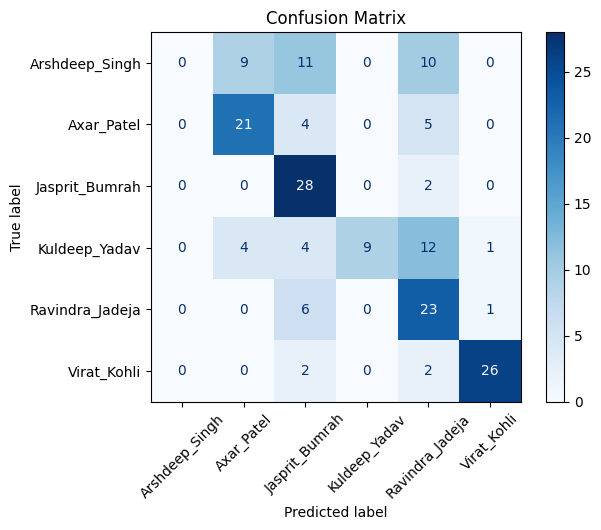

In [ ]:
import os
from PIL import Image
import pandas as pd
import torch
from transformers import CLIPProcessor, CLIPModel
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Path to validation dataset
validation_path = "/Users/nadunsenarathne/Downloads/Documents/IIT/4th Year/FYP/CricXpert/Hybrid_Spatio_Temporal_Model_For_Gait_Analysis/dataset_llm_validation"  # Update this path if needed

# Automatically get player names from folder names, filtering out non-directory files
players = sorted([f for f in os.listdir(validation_path) if os.path.isdir(os.path.join(validation_path, f))])
print(f"Detected players: {players}")

# Prepare results storage
results = []

# Evaluate images in the validation dataset
for player in players:
    player_path = os.path.join(validation_path, player)
    for img_file in os.listdir(player_path):
        if img_file.endswith((".jpg", ".png", ".jpeg")):
            # Load image
            image_path = os.path.join(player_path, img_file)
            image = Image.open(image_path)

            # Preprocess and evaluate
            inputs = processor(text=players, images=image, return_tensors="pt", padding=True)
            outputs = model(**inputs)

            # Compute probabilities and predictions
            logits_per_image = outputs.logits_per_image  # Image-to-text scores
            probs = logits_per_image.softmax(dim=1)  # Softmax to get probabilities
            predicted_index = probs.argmax().item()
            predicted_player = players[predicted_index]
            confidence = probs[0, predicted_index].item()

            # Store results
            results.append({
                "image": image_path,
                "ground_truth": player,
                "prediction": predicted_player,
                "confidence": confidence
            })

# Save results to a CSV
results_df = pd.DataFrame(results)
results_df.to_csv("llm_validation_results.csv", index=False)
print("Results saved to llm_validation_results.csv")

# Compute Metrics
y_true = results_df["ground_truth"]
y_pred = results_df["prediction"]

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=players)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=players)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Detected players: ['Arshdeep_Singh', 'Axar_Patel', 'Jasprit_Bumrah', 'Kuldeep_Yadav', 'Ravindra_Jadeja', 'Virat_Kohli']
Results saved to vit_validation_results.csv
Accuracy: 16.67%


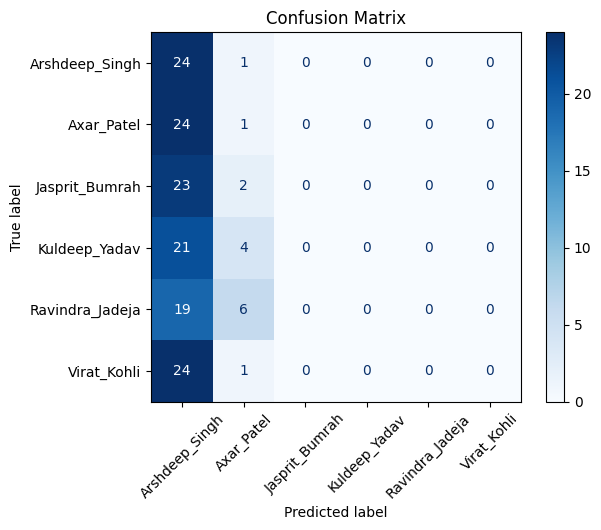

In [6]:
import os
from PIL import Image
import pandas as pd
import torch
from transformers import ViTForImageClassification, ViTImageProcessor
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize ViT model and processor
model_name = "google/vit-base-patch16-224-in21k"  # Pretrained ViT model
model = ViTForImageClassification.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)

# Path to validation dataset
validation_path = "/Users/nadunsenarathne/Downloads/Documents/IIT/4th Year/FYP/CricXpert/Hybrid_Spatio_Temporal_Model_For_Gait_Analysis/dataset_llm_validation"

# Automatically get player names from folder names, filtering out non-directory files
players = sorted([f for f in os.listdir(validation_path) if os.path.isdir(os.path.join(validation_path, f))])
print(f"Detected players: {players}")

# Map players to numerical labels
player_to_label = {player: idx for idx, player in enumerate(players)}
label_to_player = {idx: player for player, idx in player_to_label.items()}

# Prepare results storage
results = []

# Evaluate images in the validation dataset
for player in players:
    player_path = os.path.join(validation_path, player)
    for img_file in os.listdir(player_path):
        if img_file.endswith((".jpg", ".png", ".jpeg")):
            # Load and preprocess image
            image_path = os.path.join(player_path, img_file)
            image = Image.open(image_path).convert("RGB")
            inputs = processor(images=image, return_tensors="pt")

            # Forward pass through the model
            outputs = model(**inputs)
            logits = outputs.logits
            predicted_index = logits.argmax().item()
            predicted_player = label_to_player[predicted_index]
            confidence = torch.softmax(logits, dim=1)[0, predicted_index].item()

            # Store results
            results.append({
                "image": image_path,
                "ground_truth": player,
                "prediction": predicted_player,
                "confidence": confidence
            })

# Save results to a CSV
results_df = pd.DataFrame(results)
results_df.to_csv("vit_validation_results.csv", index=False)
print("Results saved to vit_validation_results.csv")

# Compute Metrics
y_true = results_df["ground_truth"]
y_pred = results_df["prediction"]

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=players)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=players)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/nadunsenarathne/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [04:02<00:00, 424kB/s] 


Detected players: ['Arshdeep_Singh', 'Axar_Patel', 'Jasprit_Bumrah', 'Kuldeep_Yadav', 'Ravindra_Jadeja', 'Virat_Kohli']
Results saved to resnet_validation_results.csv
Accuracy: 17.33%


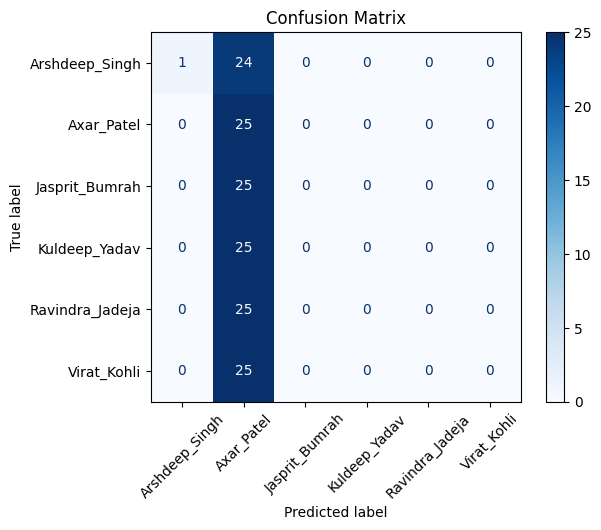

In [2]:
import os
from PIL import Image
import pandas as pd
import torch
from torchvision import models, transforms
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context


# Initialize ResNet model
model = models.resnet50(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 6)  # Replace with the number of players
model.eval()

# Path to validation dataset
validation_path = "/Users/nadunsenarathne/Downloads/Documents/IIT/4th Year/FYP/CricXpert/Hybrid_Spatio_Temporal_Model_For_Gait_Analysis/dataset_llm_validation"

# Automatically get player names from folder names, filtering out non-directory files
players = sorted([f for f in os.listdir(validation_path) if os.path.isdir(os.path.join(validation_path, f))])
player_to_label = {player: idx for idx, player in enumerate(players)}
label_to_player = {idx: player for player, idx in player_to_label.items()}
print(f"Detected players: {players}")

# Transform for ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Prepare results storage
results = []

# Evaluate images in the validation dataset
for player in players:
    player_path = os.path.join(validation_path, player)
    for img_file in os.listdir(player_path):
        if img_file.endswith((".jpg", ".png", ".jpeg")):
            # Load and preprocess image
            image_path = os.path.join(player_path, img_file)
            image = Image.open(image_path).convert("RGB")
            input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

            # Forward pass through the model
            with torch.no_grad():
                outputs = model(input_tensor)
                predicted_index = outputs.argmax(dim=1).item()
                predicted_player = label_to_player[predicted_index]
                confidence = torch.softmax(outputs, dim=1)[0, predicted_index].item()

            # Store results
            results.append({
                "image": image_path,
                "ground_truth": player,
                "prediction": predicted_player,
                "confidence": confidence
            })

# Save results to a CSV
results_df = pd.DataFrame(results)
results_df.to_csv("resnet_validation_results.csv", index=False)
print("Results saved to resnet_validation_results.csv")

# Compute Metrics
y_true = results_df["ground_truth"]
y_pred = results_df["prediction"]

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=players)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=players)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
